Este es el primer notebook del proyecto "Proyecto integrador 1 : estudio de atención en salud para un importante hospital".
Originalmente desarrollado en Python 3.9.6.
Alumno: Fernando Embrioni

Se importan las bibliotecas necesarias

In [89]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Se incorporan los datos provistos y se realiza un primer estudio de los mismos

In [90]:
df_hospital = pd.read_excel('./data/BBDD_Hospitalización.xlsx')
print(df_hospital.head())
print(df_hospital.tail())

   EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
0  53.0       NO                         NO   4.0               NO   
1  56.0       NO                         NO   7.7               NO   
2  57.0       NO                         NO  29.0               SI   
3  56.0       NO                         NO   7.0               NO   
4  55.0       NO                         NO  29.0               SI   

  VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
1                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
2                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
3                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
4                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   

   NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA  \
0                        12.0  NO                                NO     NEG   
1                        12.0  NO   

/Users/fernandoembrioni/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [91]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [92]:
df_hospital.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [93]:
#df_hospital['EDAD'].value_counts().sort_index()
#df_hospital['DIABETES'].value_counts()
#df_hospital['HOSPITALIZACIÓN ULTIMO MES'].value_counts()
#df_hospital['PSA'].value_counts().sort_index()
#df_hospital['BIOPSIAS PREVIAS'].value_counts()
#df_hospital['VOLUMEN PROSTATICO'].value_counts()
#df_hospital['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].value_counts()
#df_hospital['NUMERO DE MUESTRAS TOMADAS'].value_counts().sort_index()
#df_hospital['CUP'].value_counts()
#df_hospital['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()
#df_hospital['BIOPSIA'].value_counts()
#df_hospital['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()
#df_hospital['FIEBRE'].value_counts()
#df_hospital['ITU'].value_counts()
#df_hospital['TIPO DE CULTIVO'].value_counts()
#df_hospital['AGENTE AISLADO'].value_counts()
#df_hospital['PATRON DE RESISTENCIA'].value_counts()
#df_hospital['HOSPITALIZACION'].value_counts()
#df_hospital['DIAS HOSPITALIZACION MQ'].value_counts()
df_hospital['DIAS HOSPITALIZACIÓN UPC'].value_counts()


0.0    565
3.0      2
2.0      1
Name: DIAS HOSPITALIZACIÓN UPC, dtype: int64

<AxesSubplot: xlabel='EDAD', ylabel='Count'>

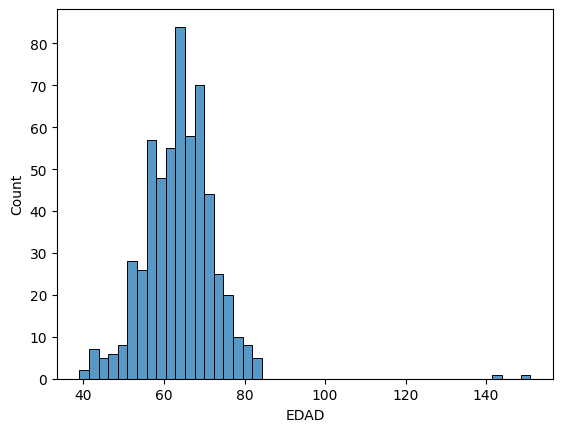

In [94]:
# Se detectan outliers en EDAD
sns.histplot(data=df_hospital['EDAD'])

<AxesSubplot: xlabel='PSA', ylabel='Count'>

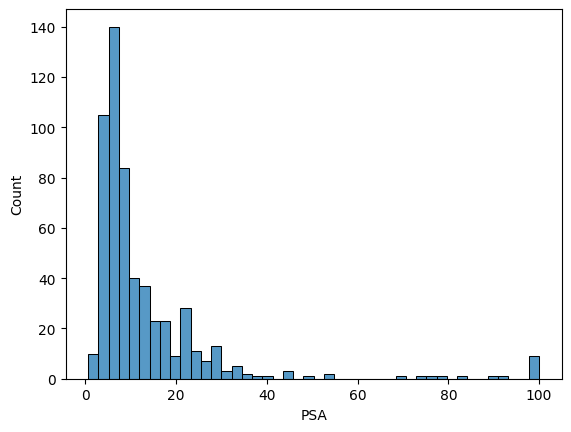

In [95]:
# Se entiende la distribucion de PSA
sns.histplot(data=df_hospital['PSA'])

<AxesSubplot: xlabel='HOSPITALIZACION', ylabel='Count'>

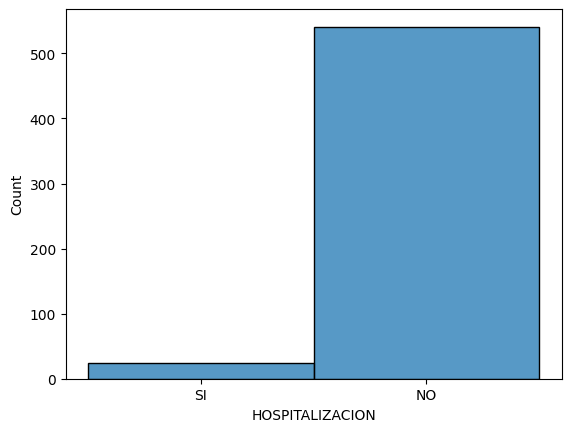

In [96]:
# Se entiende la distribucion de HOSPITALIZACION (Muestra desbalanceada)
sns.histplot(data=df_hospital['HOSPITALIZACION'])

De un primer estudio de los datos, tenemos:

570 registros en total. 20 columnas.
Algunos nombres de columnas son extensos y/o contienen acentos.

EDAD: Cuantitativa discreta (39..84). Hay 2 nulos. Con outliers: 143 y 151
DIABETES: Cualitativa (SI/NO). Hay 2 nulos
HOSPITALIZACIÓN ULTIMO MES (SI/NO): Cualitativa. Hay 2 nulos. Nombre de campo muy extenso
PSA: Cuantitativa continua (0.6..100). Hay 6 nulos. Podria tener outliers (a confirmar)
BIOPSIAS PREVIAS (SI/NO): Cualitativa. Hay 4 nulos
VOLUMEN PROSTATICO (SI/NO): Cualitativa. Hay 3 nulos
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS (5 categorias): Cualitativa. Hay 2 nulos. Nombre de campo muy extenso
NUMERO DE MUESTRAS TOMADAS (4..24): Cuantitativa discreta. Hay 2 nulos
CUP (Uso de cateter) (SI/NO): Cualitativa. Hay 3 nulos
ENF. CRONICA PULMONAR OBSTRUCTIVA (4 categorias): Cualitativa. Hay 4 nulos. Nombre de campo muy extenso. Se podrian agrupar los "SI", "SI, EPOC" y "SI, ASMA"
BIOPSIA (11 categorias): Cualitativa. Hay 2 nulos
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA (NO,1..9): Cuantitativa discreta. Presenta valores no numericos. Hay 2 nulos. Nombre de campo muy extenso. Se podria separar en dos campos
FIEBRE (SI/NO): Cualitativa. Hay 2 nulos
ITU (Infeccion del tracto urinario) (SI/NO): Cualitativa. Hay 2 nulos
TIPO DE CULTIVO (4 categorias): Cualitativa. Hay 2 nulos
AGENTE AISLADO (3 categorias): Cualitativa. Hay 19 nulos
PATRON DE RESISTENCIA (5 categorias): Cualitativa. Hay 2 nulos
HOSPITALIZACION (SI/NO): Cualitativa. Hay 5 nulos
DIAS HOSPITALIZACION MQ (0..12): Cuantitativa discreta. Hay 2 nulos
DIAS HOSPITALIZACIÓN UPC (0..3): Cuantitativa discreta. Hay 2 nulos. Nombre del campo con acento

Limpieza y transformacion de datos

In [97]:
# EDAD - Outliers
df_hospital[df_hospital['EDAD']>100]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
161,143.0,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
181,151.0,NO,NO,5.7,NO,SI,OTROS,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [98]:
# Se actualizan las edades outliers con la mediana de la edad
mediana_edad = df_hospital['EDAD'].median()
df_hospital.loc[[161,181],'EDAD'] = mediana_edad # Se actualizan los registros utilizando sus indices
df_hospital.iloc[[161,181]]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
161,64.0,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
181,64.0,NO,NO,5.7,NO,SI,OTROS,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [99]:
# EDAD - Nulos
df_hospital[df_hospital['EDAD'].isna()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Los registros con edades nulas tambien tienen nulos en el resto de los campos. Se los elimina
df_hospital.dropna(how='all', inplace=True)
df_hospital.tail()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
563,67.0,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


Ademas de haber eliminado los nulos de EDAD, tambien se eliminaron los de otras variables

In [101]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Quedan nulos en:

PSA: 4 nulos
BIOPSIAS PREVIAS: 2 nulos
VOLUMEN PROSTATICO: 1 nulo
CUP: 1 nulo
ENF. CRONICA PULMONAR OBSTRUCTIVA: 2 nulos
AGENTE AISLADO: 17 nulos
HOSPITALIZACION: 3 nulos

In [102]:
# PSA - Nulos
df_hospital[df_hospital['PSA'].isna()]
# Por el momento no proceso estos nulos hasta no saber si existe una correlacion entre esta columna y alguna otra

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
121,62.0,NO,NO,NaN,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


Se renombran campos extensos o con acento y se cambian espacios por _ (Guion bajo)

In [103]:
df_hospital.rename(columns={'HOSPITALIZACIÓN ULTIMO MES':'HOSPIT_ULT_MES',
                            'BIOPSIAS PREVIAS':'BIOPSIAS_PREVIAS',
                            'VOLUMEN PROSTATICO':'VOLUMEN_PROSTATICO',
                            'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS':'ANTIBIOTICO_UTILIZADO',
                            'NUMERO DE MUESTRAS TOMADAS':'NUM_MUESTRAS_TOMADAS',
                            'ENF. CRONICA PULMONAR OBSTRUCTIVA':'ENF_PULMONAR',
                            'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'DIAS_HASTA_INFECCION',
                            'TIPO DE CULTIVO':'TIPO_DE_CULTIVO',
                            'AGENTE AISLADO':'AGENTE_AISLADO',
                            'PATRON DE RESISTENCIA':'PATRON_DE_RESISTENCIA',
                            'DIAS HOSPITALIZACION MQ':'DIAS_HOSPIT_MQ',
                            'DIAS HOSPITALIZACIÓN UPC':'DIAS_HOSPIT_UPC'},inplace=True)
df_hospital.columns

Index(['EDAD', 'DIABETES', 'HOSPIT_ULT_MES', 'PSA', 'BIOPSIAS_PREVIAS',
       'VOLUMEN_PROSTATICO', 'ANTIBIOTICO_UTILIZADO', 'NUM_MUESTRAS_TOMADAS',
       'CUP', 'ENF_PULMONAR', 'BIOPSIA', 'DIAS_HASTA_INFECCION', 'FIEBRE',
       'ITU', 'TIPO_DE_CULTIVO', 'AGENTE_AISLADO', 'PATRON_DE_RESISTENCIA',
       'HOSPITALIZACION', 'DIAS_HOSPIT_MQ', 'DIAS_HOSPIT_UPC'],
      dtype='object')

Se pasan los SI/NOs a 1/0 para DIABETES, HOSPIT ULT MES, BIOPSIAS PREVIAS, VOLUMEN PROSTATICO, CUP, FIEBRE, ITU y HOSPITALIZACION

In [104]:
df_hospital['DIABETES']           = df_hospital['DIABETES'].replace(['SI', 'NO'], [1, 0])
df_hospital['HOSPIT_ULT_MES']     = df_hospital['HOSPIT_ULT_MES'].replace(['SI', 'NO'], [1, 0])
df_hospital['BIOPSIAS_PREVIAS']   = df_hospital['BIOPSIAS_PREVIAS'].replace(['SI', 'NO'], [1, 0])
df_hospital['VOLUMEN_PROSTATICO'] = df_hospital['VOLUMEN_PROSTATICO'].replace(['SI', 'NO'], [1, 0])
df_hospital['CUP']                = df_hospital['CUP'].replace(['SI', 'NO'], [1, 0])
df_hospital['FIEBRE']             = df_hospital['FIEBRE'].replace(['SI', 'NO'], [1, 0])
df_hospital['ITU']                = df_hospital['ITU'].replace(['SI', 'NO'], [1, 0])
df_hospital['HOSPITALIZACION']    = df_hospital['HOSPITALIZACION'].replace(['SI', 'NO'], [1, 0])

In [105]:
df_hospital.head()

,EDAD,DIABETES,HOSPIT_ULT_MES,PSA,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,ANTIBIOTICO_UTILIZADO,NUM_MUESTRAS_TOMADAS,CUP,ENF_PULMONAR,BIOPSIA,DIAS_HASTA_INFECCION,FIEBRE,ITU,TIPO_DE_CULTIVO,AGENTE_AISLADO,PATRON_DE_RESISTENCIA,HOSPITALIZACION,DIAS_HOSPIT_MQ,DIAS_HOSPIT_UPC
0,53.0,0,0,4.0,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NO,NEG,1,1,0,NO,NO,NO,1.0,2.0,0.0
1,56.0,0,0,7.7,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NO,NEG,1,1,0,NO,NO,NO,1.0,5.0,0.0
2,57.0,0,0,29.0,1.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0.0,NO,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1.0,4.0,3.0
3,56.0,0,0,7.0,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NO,NEG,1,1,0,NO,NO,NO,1.0,5.0,0.0
4,55.0,0,0,29.0,1.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0.0,NO,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1.0,4.0,3.0


In [106]:
# Se calculan las correlaciones entre las variables numericas
correlaciones = df_hospital.corr()
correlaciones

/var/folders/98/6bmv0tnx3l7c05z7h85skmfh0000gn/T/ipykernel_58629/624409877.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df_hospital.corr()


,EDAD,DIABETES,HOSPIT_ULT_MES,PSA,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,NUM_MUESTRAS_TOMADAS,CUP,FIEBRE,ITU,HOSPITALIZACION,DIAS_HOSPIT_MQ,DIAS_HOSPIT_UPC
EDAD,1.000000,0.137119,-0.026309,0.184424,-0.088971,0.258289,-0.206695,0.133400,-0.011662,-0.003378,-0.071364,-0.031992,-0.035123
DIABETES,0.137119,1.000000,0.026734,-0.024513,-0.060830,0.083287,-0.049769,-0.029801,-0.025079,0.018344,0.064795,0.073645,-0.025342
HOSPIT_ULT_MES,-0.026309,0.026734,1.000000,-0.037766,-0.031283,-0.025108,0.033761,-0.007950,0.051501,-0.009737,0.073803,0.042777,-0.006762
PSA,0.184424,-0.024513,-0.037766,1.000000,-0.039356,0.129809,-0.204606,0.088767,-0.036547,-0.027078,-0.062973,-0.033382,0.043941
BIOPSIAS_PREVIAS,-0.088971,-0.060830,-0.031283,-0.039356,1.000000,-0.056198,0.391311,-0.027956,0.032060,-0.034300,-0.011375,-0.008025,0.156728
VOLUMEN_PROSTATICO,0.258289,0.083287,-0.025108,0.129809,-0.056198,1.000000,-0.111982,0.052619,0.037766,0.064560,0.012535,0.034260,0.044830
NUM_MUESTRAS_TOMADAS,-0.206695,-0.049769,0.033761,-0.204606,0.391311,-0.111982,1.000000,-0.085885,0.063973,0.026467,0.080348,0.091232,0.146577
CUP,0.133400,-0.029801,-0.007950,0.088767,-0.027956,0.052619,-0.085885,1.000000,-0.022271,-0.008717,-0.017817,-0.014586,-0.006053
FIEBRE,-0.011662,-0.025079,0.051501,-0.036547,0.032060,0.037766,0.063973,-0.022271,1.000000,0.391430,0.689226,0.595333,0.271810
ITU,-0.003378,0.018344,-0.009737,-0.027078,-0.034300,0.064560,0.026467,-0.008717,0.391430,1.000000,0.491884,0.647785,-0.007414


In [108]:
# Las correlaciones mas fuertes que tiene PSA son con:
# a) EDAD: Correlacion directa (0.18)
# b) VOLUMEN PROSTATICO: Correlacion directa (0.13)
# c) NUM MUESTRAS TOMADAS: Correlacion inversa (-0.20)
# Se analizan los registros con PSA nulo

PSA_min = min(df_hospital['PSA'].values)
PSA_max = max(df_hospital['PSA'].values)
PSA_mediana = np.median(df_hospital[df_hospital['PSA'].notnull()].PSA.values)

EDAD_min = min(df_hospital['EDAD'].values)
EDAD_max = max(df_hospital['EDAD'].values)
EDAD_mediana = np.median(df_hospital[df_hospital['EDAD'].notnull()].EDAD.values)

VOL_PROST_min = min(df_hospital['VOLUMEN_PROSTATICO'].values)
VOL_PROST_max = max(df_hospital['VOLUMEN_PROSTATICO'].values)

NUM_M_TOMADAS_min = min(df_hospital['NUM_MUESTRAS_TOMADAS'].values)
NUM_M_TOMADAS_max = max(df_hospital['NUM_MUESTRAS_TOMADAS'].values)
NUM_M_TOMADAS_mediana = np.median(df_hospital[df_hospital['NUM_MUESTRAS_TOMADAS'].notnull()].NUM_MUESTRAS_TOMADAS.values)

print('PSA va de {} a {} con mediana en {}'.format(PSA_min, PSA_max, PSA_mediana))
print('EDAD va de {} a {} con mediana en {}'.format(EDAD_min, EDAD_max, EDAD_mediana))
print('VOLUMEN PROSTATICO puede ser {} o {}'.format(VOL_PROST_min, VOL_PROST_max))
print('NUM MUESTRAS TOMADAS va de {} a {} con mediana en {}'.format(NUM_M_TOMADAS_min, NUM_M_TOMADAS_max, NUM_M_TOMADAS_mediana))

PSA va de 0.6 a 100.0 con mediana en 8.0
EDAD va de 39.0 a 84.0 con mediana en 64.0
VOLUMEN PROSTATICO puede ser 0.0 o 1.0
NUM MUESTRAS TOMADAS va de 4.0 a 24.0 con mediana en 12.0


<AxesSubplot: xlabel='EDAD', ylabel='PSA'>

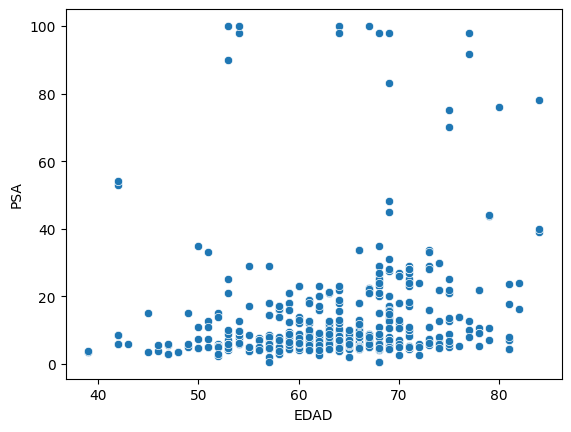

In [111]:
sns.scatterplot(df_hospital, x='EDAD', y='PSA')

<AxesSubplot: xlabel='VOLUMEN_PROSTATICO', ylabel='PSA'>

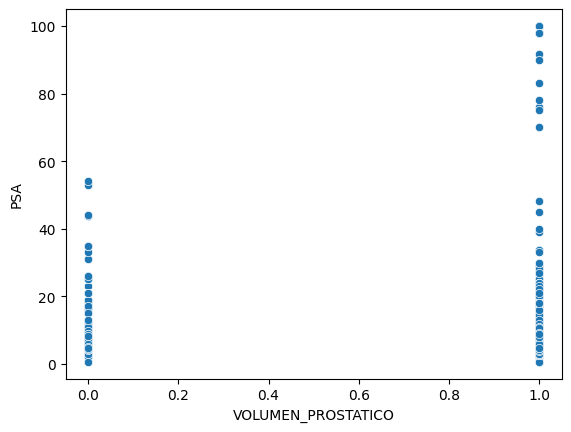

In [112]:
sns.scatterplot(df_hospital, x='VOLUMEN_PROSTATICO', y='PSA')

<AxesSubplot: xlabel='NUM_MUESTRAS_TOMADAS', ylabel='PSA'>

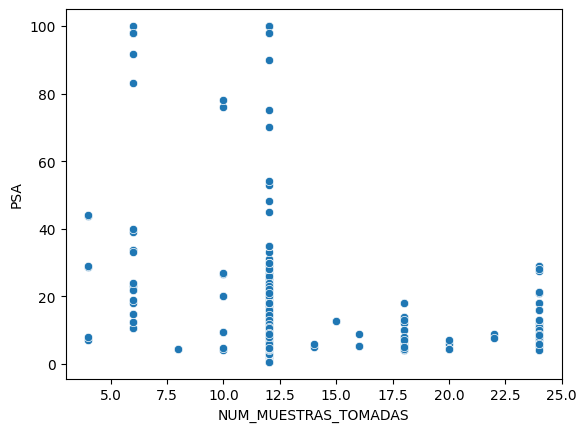

In [113]:
sns.scatterplot(df_hospital, x='NUM_MUESTRAS_TOMADAS', y='PSA')

In [85]:
df_hospital[df_hospital['PSA'].isna()]

,EDAD,DIABETES,HOSPIT ULT MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIZADO,NUM MUESTRAS TOMADAS,CUP,ENF PULMONAR,BIOPSIA,DIAS HASTA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPIT MQ,DIAS HOSPIT UPC
9,44.0,0,0,NaN,0.0,0.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NO,NEG,2,1,0,NO,NO,NO,1.0,3.0,0.0
76,55.0,0,0,NaN,0.0,0.0,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,0.0,NO,HIPERPLASIA PROSTATICA,NO,0,0,NO,NO,NO,0.0,0.0,0.0
103,57.0,0,0,NaN,1.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,0.0,NO,NEG,NO,0,0,NO,NO,NO,0.0,0.0,0.0
121,58.0,0,0,NaN,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,0.0,NO,ADENOCARCINOMA GLEASON 8,NO,0,0,NO,NO,NO,0.0,0.0,0.0


Conclusiones para la imputacion de valores en los PSA nulos

Para el registro con indice 9:

    EDAD=44 -> PSA bajo
    VOLUMEN PROSTATICO=0 -> PSA bajo
    NUM MUESTRAS TOMADAS=12 -> PSA bajo

    Imputaremos el valor 8 al PSA de este registro

Para el registro con indice 76:

    EDAD=55 -> PSA bajo
    VOLUMEN PROSTATICO=0 -> PSA bajo
    NUM MUESTRAS TOMADAS=18 -> PSA bajo

    Imputaremos el valor 8 al PSA de este registro

Para el registro con indice 103:

    EDAD=57 -> PSA bajo
    VOLUMEN PROSTATICO=1 -> PSA indeterminado
    NUM MUESTRAS TOMADAS=16 -> PSA bajo

    Imputaremos el valor 8 al PSA de este registro

Para el registro con indice 121:

    EDAD=58 -> PSA bajo
    VOLUMEN PROSTATICO=1 -> PSA indeterminado
    NUM MUESTRAS TOMADAS=6 -> PSA indeterminado

    Imputaremos el valor 8 al PSA de este registro

In [114]:
df_hospital['PSA'].fillna(8, inplace=True)

In [116]:
# BIOPSIAS PREVIAS - Nulos
df_hospital[df_hospital['BIOPSIAS_PREVIAS'].isna()]

,EDAD,DIABETES,HOSPIT_ULT_MES,PSA,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,ANTIBIOTICO_UTILIZADO,NUM_MUESTRAS_TOMADAS,CUP,ENF_PULMONAR,BIOPSIA,DIAS_HASTA_INFECCION,FIEBRE,ITU,TIPO_DE_CULTIVO,AGENTE_AISLADO,PATRON_DE_RESISTENCIA,HOSPITALIZACION,DIAS_HOSPIT_MQ,DIAS_HOSPIT_UPC
92,58.0,0,0,7.80,NaN,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NO,NEG,NO,0,0,NO,NO,NO,0.0,0.0,0.0
565,69.0,0,0,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,0,0,NO,NO,NO,0.0,0.0,0.0


Continuar aqui